In [108]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import pandas as pd

Problem 1

part ii

In [109]:
I = np.zeros(20)   #initialize an array to store In

In [110]:
I[0] = 1   #initialize I1

In [111]:
for i in range(1, 20):
    I[i] = math.e - (i+1)*I[i-1]    #In = e - nI(n-1)

In [112]:
#print out n and In
for n in range(2, 21):
    print('{0:8}{1:13.6e}'.format(n, I[n-1]))
    print('\n')

       2 7.182818e-01


       3 5.634363e-01


       4 4.645365e-01


       5 3.955995e-01


       6 3.446845e-01


       7 3.054900e-01


       8 2.743615e-01


       9 2.490280e-01


      10 2.280015e-01


      11 2.102652e-01


      12 1.950999e-01


      13 1.819831e-01


      14 1.705191e-01


      15 1.604959e-01


      16 1.503482e-01


      17 1.623631e-01


      18-2.042536e-01


      19 6.599099e+00


      20-1.292637e+02




Problem 3

In [113]:
#initialize matrix A
def matrix_A(n):
    A = np.identity(n)
    for i in range(n):
        ti = -1 + 2*i/(n-1)
        for j in range(n):
            A[i][j] = ti**j
    return A
            

In [114]:
#initialize vector b
def vec_b(A, X):
    return np.dot(A, X)

In [115]:
#compute solution x
def X_comp(A, b):
    A_inv = np.linalg.inv(A)
    return np.dot(A_inv, b)

In [116]:
#compute absolute error between x and x computed
def abs_err(x, x_comp):
    return np.linalg.norm(x-x_comp)
    

In [117]:
#compute the relative error between x and x computed
def rel_err(x, x_comp):
    return abs_err(x, x_comp)/np.linalg.norm(x)

In [118]:
#initialize the result matrix
res = np.zeros((20, 4))

In [119]:
#fill in the result matrix
#first column is n
#second column is absolute error
#third column is relative error
#fourth column is condition number of A
for n in range(2, 41, 2):
    X = np.ones(n)
    A = matrix_A(n)
    b = vec_b(A, X)
    X_c = X_comp(A, b)
    res[int(n/2 -1)][0] = int(n)
    res[int(n/2 -1)][1] = abs_err(X, X_c)
    res[int(n/2 -1)][2] = rel_err(X, X_c)
    res[int(n/2 -1)][3] = np.linalg.cond(A)
    

In [120]:
#output the result table
df = pd.DataFrame(res, columns=['n', '||𝑥−𝑥𝑐𝑜𝑚𝑝||2','||𝑥−𝑥𝑐𝑜𝑚𝑝||2/||𝑥||2','𝜅2(𝐴)'])
df.set_index('n')

,||𝑥−𝑥𝑐𝑜𝑚𝑝||2,||𝑥−𝑥𝑐𝑜𝑚𝑝||2/||𝑥||2,𝜅2(𝐴)
n,,,
2.0,0.000000e+00,0.000000e+00,1.000000e+00
4.0,6.377746e-16,3.188873e-16,8.011561e+00
6.0,2.673771e-15,1.091562e-15,6.382728e+01
8.0,4.240819e-14,1.499356e-14,5.353531e+02
10.0,3.316507e-13,1.048771e-13,4.626450e+03
12.0,3.859430e-12,1.114121e-12,4.075488e+04
14.0,6.522267e-11,1.743149e-11,3.638308e+05
16.0,5.467445e-10,1.366861e-10,3.280032e+06
18.0,6.309773e-09,1.487228e-09,2.979360e+07


Problem 4

In [121]:
E1 = np.array([[0, 1], [-1, -1]])  

In [122]:
e1 = np.array([1, 0])

In [123]:
E2 = scipy.linalg.expm(E1*10)

In [124]:
E2

array([[-0.00217012,  0.00538548],
       [-0.00538548, -0.0075556 ]])

In [125]:
#compute the auxiliary value s
s = (1 - np.dot(e1.T, E2[:, 0] * 0)) / np.dot(e1.T, E2[:, 1])


In [126]:
s

185.68444885271484

In [127]:
alpha_s = np.transpose(np.array([0, s]))

In [128]:
#set x
x = np.linspace(0, 10, 100) 

In [129]:
#initialize y
y = np.zeros(100)

In [130]:
#compute y
for i in range(100):
    E3 = scipy.linalg.expm(E1*x[i])
    y[i] = np.dot(E3, alpha_s)[0]

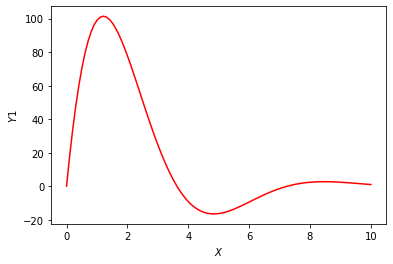

In [131]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$Y1$')
plt.plot(x, y,'r')
plt.show()

In [132]:
#initialize s_new with s+perturbation
s_new = s+10**-8

In [133]:
alpha_s_new = np.transpose(np.array([0, s_new]))

In [134]:
#initialize the y_new array to store y with perturbation
y_new = np.zeros(100)

In [135]:
#compute y with perturbation
for i in range(100):
    E4 = scipy.linalg.expm(E1*x[i])
    y_new[i] = np.dot(E4, alpha_s_new)[0]

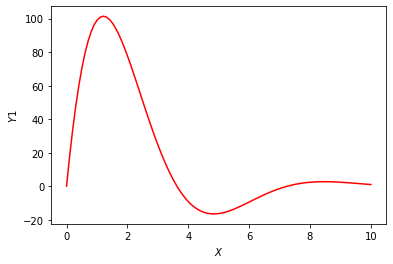

In [136]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$Y1$')
plt.plot(x, y_new,'r')
plt.show()

part ii

In [137]:
E5 = np.array([[0, 1], [2, 2]])

In [138]:
E6 = scipy.linalg.expm(E5*10)

In [139]:
E6

array([[1.54916081e+11, 2.11619302e+11],
       [4.23238603e+11, 5.78154684e+11]])

In [140]:
#compute the s given sigma = gamma = -2
s1 = (1 - np.dot(e1.T, E6[:, 0] * 0)) / np.dot(e1.T, E6[:, 1])

In [141]:
s1

4.725466872852787e-12

In [142]:
#initialize y
y1 = np.zeros(100)

In [143]:
alpha_s1 = np.transpose(np.array([0, s1]))

In [144]:
#compute y
for i in range(100):
    E7 = scipy.linalg.expm(E5*x[i])
    y1[i] = np.dot(E7, alpha_s1)[0]

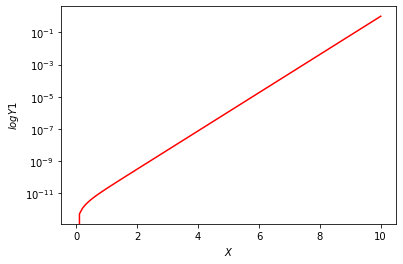

In [145]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$logY1$')
plt.semilogy(x, y1,'r')
plt.show()

In [146]:
#set s1 with perturbation
s1_new = s1+10**-8

In [147]:
alpha_s1_new = np.transpose(np.array([0, s1_new]))

In [148]:
y1_new = np.zeros(100)

In [149]:
#compute y with perturbation
for i in range(100):
    E8 = scipy.linalg.expm(E5*x[i])
    y1_new[i] = np.dot(E8, alpha_s1_new)[0]

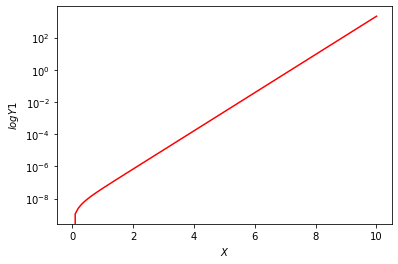

In [150]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$logY1$')
plt.semilogy(x, y1_new,'r')
plt.show()

Problem 5

part i

In [151]:
ME1 = np.array([[0, 1], [-1, -1]])

In [152]:
ME1e = scipy.linalg.expm(ME1)

In [153]:
#Compute S2,0
s20 = (1 - np.dot(e1.T, E2[:, 0] * 0)) / np.dot(e1.T, ME1e[:, 1])

In [154]:
s20

1.8743889663662754

In [155]:
s = np.zeros((10, 2))

In [156]:
#initialize S1, 0 and S2, 0
s[0] = [0, s20]

In [157]:
#calculate s recursively
for i in range(1, 10):
    s[i] = np.dot(ME1e, s[i-1])

In [158]:
s

array([[ 0.        ,  1.87438897],
       [ 1.        ,  0.23653469],
       [ 0.78589311, -0.50365818],
       [ 0.24974854, -0.48283775],
       [-0.09283826, -0.19417337],
       [-0.1648383 ,  0.02502657],
       [-0.095392  ,  0.0911006 ],
       [-0.01432729,  0.06238857],
       [ 0.02383303,  0.01551671],
       [ 0.02400093, -0.010757  ]])

In [159]:
x = np.linspace(0, 10, 100)

In [160]:
y = np.zeros((100, 2))

In [161]:
#calculate y
for i in range(1, 100):
    ME3 = scipy.linalg.expm(ME1*(x[i]%1))
    y[i] = np.dot(ME3, s[i//10])

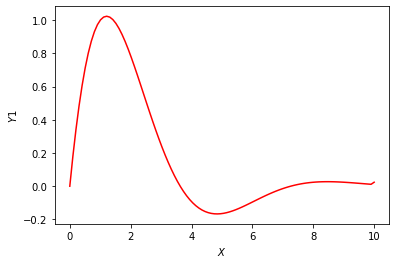

In [162]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$Y1$')
plt.plot(x, y[:, 0],'r')
plt.show()

In [163]:
y_new = np.zeros((100, 2))

In [164]:
#calculate y with perturbation
for i in range(1, 100):
    ME3 = scipy.linalg.expm(ME1*(x[i]%1))
    y_new[i] = np.dot(ME3, s[i//10] + 10**-8)

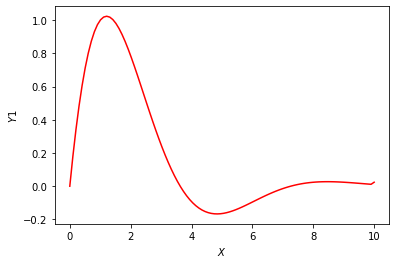

In [165]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$Y1$')
plt.plot(x, y_new[:, 0],'r')
plt.show()

part ii

In [166]:
ME2 = np.array([[0, 1], [2, 2]])

In [167]:
ME2e = scipy.linalg.expm(ME2)

In [168]:
#compute the s given sigma = gamma = -2
s20 = (1 - np.dot(e1.T, E6[:, 0] * 0)) / np.dot(e1.T, ME2e[:, 1])


In [169]:
s20

0.23274868308465502

In [170]:
s_ii = np.zeros((10, 2))

In [171]:
#initialize s1, 0 and s2, 0
s_ii[0] = [0, s20]

In [172]:
for i in range(1, 10):
    s_ii[i] = np.dot(ME2e, s_ii[i-1])

In [173]:
#result of auxiliary values s
s_ii

array([[0.00000000e+00, 2.32748683e-01],
       [1.00000000e+00, 2.84398470e+00],
       [1.58452858e+01, 4.33439573e+01],
       [2.43684026e+02, 6.65783028e+02],
       [3.74416132e+03, 1.02292514e+04],
       [5.75267112e+04, 1.57165904e+05],
       [8.83861362e+05, 2.41475415e+06],
       [1.35799678e+07, 3.71011619e+07],
       [2.08647569e+08, 5.70035760e+08],
       [3.20573722e+09, 8.75823696e+09]])

In [174]:
y_ii = np.zeros((100, 2))

In [175]:
#compute y
for i in range(1, 100):
    ME4 = scipy.linalg.expm(ME2*(x[i]%1))
    y_ii[i] = np.dot(ME4, s_ii[i//10])

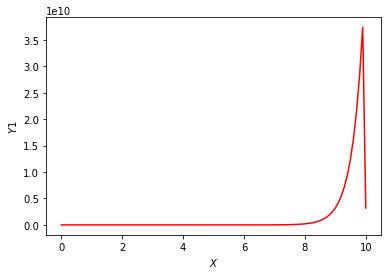

In [176]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$Y1$')
plt.plot(x, y_ii[:, 0],'r')
plt.show()

In [177]:
y_ii_new = np.zeros((100, 2))

In [178]:
#compute y with perturbation
for i in range(1, 100):
    ME4 = scipy.linalg.expm(ME2*(x[i]%1))
    y_ii_new[i] = np.dot(ME4, s_ii[i//10] + 10**-8)

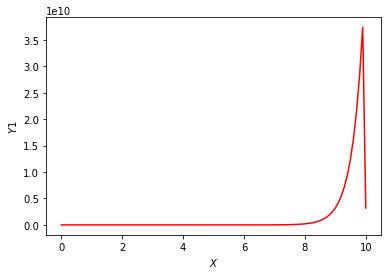

In [179]:
fig = plt.figure()
plt.xlabel('$X$')
plt.ylabel('$Y1$')
plt.plot(x, y_ii_new[:, 0],'r')
plt.show()